# Control óptimo para un modelo SIR determinista multipoblacional

## Francisco Valentín Valerio López
## Facultad de Ciencias Físico Matemáticas - Benemérita Universidad Autónoma de Puebla

### Introducción

Continuando con el objetivo del trabajo, ahora pasamos a resolver el problema para un modelo SIR estocástico. La razón para esto es que existen fluctuaciones aleatorias en la tasa de contagio dentro de la población. Físicamente, dichas fluctuaciones representan el nivel de interacción entre individuos susceptibles y contagiados. La interacción entre individuos en una población espacialmente estructurada no siempre es la misma: hay días en los que hay un mayor flujo de personas hacia centros urbanos (trabajo, escuela, etc.) que otros, existen eventos que propician una mayor concentración de personas en un sólo lugar, etcétera.

<div style="text-align: center">
    <figure>
        <img src='https://imagenescityexpress.scdn6.secure.raxcdn.com/sites/default/files/2020-01/que-hacer-cerca-zocalo.jpg' width='350' height='200' style="padding-right: 10px;" />
        <img src='https://www.debate.com.mx/__export/1638411208069/sites/debate/img/2021/12/01/amlo_zocalo_de_la_cdmx_lleno.jpeg_1902800913.jpeg' width='350' height='200' style="padding-left: 10px;" /> <br>
        <figcaption> No siempre se tiene la misma cantidad de contactos dentro de una población. Están sujetos a distintas condiciones sociales, económicas y temporales. Esto puede representarse como una fluctuación aleatoria en la tasa de contactos. </figcaption>
    </figure>
</div>

Por este motivo, para obtener una dinámica que incluya estos factores, y, por lo tanto, haga más realista la evolución de una epidemia, debemos considerar estas fluctuaciones aleatorias en el nivel de interacción. Esto da pie a que introduzcamos un [*término de ruido*](https://es.wikipedia.org/wiki/Ruido_blanco_gaussiano), para la tasa de contagio de un sistema epidemiológico SIR con control en la tasa de población, por lo que será necesario modificar al sistema para expresarlo en términos de [*ecuaciones diferenciales estocásticas*](https://betanalpha.github.io/assets/case_studies/stochastic_differential_equations.html) (*Stochastic Differential Equations* (SDEs)).

De manera general, una SDE se escribe como:

$$
    dx = f(x(t),t) dt + g(x(t),t) dW_t \tag{1}
$$

donde $x$ es el [*proceso estocástico*](https://en.wikipedia.org/wiki/Stochastic_process) que intentamos modelar, $f(x,t)$ es el *término de deriva*, que dicta la dirección de movimiento del proceso estocástico, también se le puede considerar como la parte *determinista*, $g(x,t)$ es el *término de difusión* que establece cómo se verá el proceso por el ruido aleatorio y $W_t$ es un [*proceso de Wiener*](https://mathworld.wolfram.com/WienerProcess.html), también conocido como *ruido blanco Gaussiano*, o bien, como [*movimiento Browniano*](https://mathworld.wolfram.com/BrownianMotion.html).

Para el modelo SIR controlado de una población:

$$
    \begin{split}
            \frac{dS}{dt} &= -(1-u) \beta S I \\
            \frac{dI}{dt} &= (1-u) \beta S I  - \gamma I \\
            \frac{dR}{dt} &= \gamma I \\
        \end{split} \tag{2}
$$

proponemos que el término de difusión afecte a la tasa de contacto entre individuos susceptibles e infectados, por lo que expresamos al sistema anterior en términos de un sistema de ecuaciones diferenciales estocásticas:

$$
    \begin{split}
        dS &= -(1-u) \beta SI dt - \sigma SI dW \\
        dI &= ((1-u) \beta SI - \gamma I) dt + \sigma SI dW \\
        dR &= \gamma I \\
    \end{split} \tag{3}
$$

donde $\sigma$ es el coeficiente de difusión del sistema que determina la intensidad de la fluctuación aleatoria en el sistema.

Ahora bien, dado que la dinámica del sistema pasa de ser determinista a estocástica, la ecuación de Hamilton-Jacobi-Bellman (HJB) debe modificarse para tomar en cuenta a las fluctuaciones. Veamos rápidamente como se obtiene. Para una ecuación diferencial estocástica de la forma (1), definimos la función de costo objetivo, $J(x_t, t)$:

$$
    J(x_t, t) = \min_{u_t} \Big\{ g(x_t, u_t, t) dt + \langle J(x_{t + dt}, t + dt) \rangle \Big\} \tag{4}
$$

donde $\langle J(x_{t + dt}, t + dt) \rangle$ es el valor esperado, o promedio, de la $J$.
Hacemos una expansión en serie de Taylor para $J$ en $dt$ y en $dx$. Sin embargo, como $\langle dx^2 \rangle$ es de orden $dt$ debido al proceso de Wiener, se debe expandir hasta segundo orden:

$$
    \begin{split}
        \langle J(x_{t + dt}, t + dt) \rangle &= \int \mathcal{N} (x_{t+dt} | \sigma dt) J (x_{t+dt}, t+dt) \, dx_{t+dt} \\
        &= J(x_t, t) + \frac{\partial J}{\partial t} \, dt + \langle dx \rangle \frac{\partial J}{\partial x} + \frac12 \langle dx^2 \rangle \frac{\partial J}{\partial x^2} \\ 
    \end{split} \tag{5}
$$

donde $\langle dx \rangle = f(x,u,t) \, dt$ y $ \langle dx^2 \rangle = \sigma(x,u,t) \, dt$.

Por lo tanto, la ecuación de (HJB) pasa a ser:

$$
    \frac{\partial J}{\partial t} + \min_{u \in \mathcal{U}} \Big\{ g(x,u,t) + f(x,u,t)^T \cdot \nabla J(x,t) + \frac12 \sigma (x,u,t) \cdot \nabla^2 J(x,t) \Big\} = 0 \tag{6}
$$

que corresponde a la *ecuación de Hamilton-Jacobi-Bellman estocástica* con condición de frontera $J(x,t_f) = h(x(t_f),t_f)$.

Es importante que notemos que en presencia de ruido, la ecuación de HJB (6) se extiende a derivadas de segundo orden, ya que hay que calcular el Laplaciano de $J(x,t)$, pero en realidad, se trata de una ecuación diferencial parcial de segundo orden no lineal, por lo que se puede utilizar el mismo esquema de resolución, empleando una PINN, como en las notebooks 1 y 2 de este repositorio.

Consideramos nuevamente a la función de costo instantáneo $g(x,u,t)$:

$$
    g(I,u) = a I^2 + b u^2 \quad a,b \in \mathbb{R} \tag{7}
$$

De la misma forma, la obtención de la política de control óptima, así como de la ecuación de HJB a resolver, se hace de la misma manera que en los casos anteriores, así que, para el modelo (3), la estrategia de control óptima está dada como:

$$
    \boxed{
        u^* = - \frac{\beta SI}{2b} \left( \frac{\partial J}{\partial S} - \frac{\partial J}{\partial I}  \right)
    } \tag{8}
$$

Sustituyendo este valor en la ecuación (6), la ecuación de HJB para este sistema es:

$$
    \boxed{
        \frac{\partial J}{\partial t} + a I^2 - \frac{(\beta SI)^2}{2b} \left( \frac12 \left[ \left( \frac{\partial J}{\partial S} \right)^2 + \left( \frac{\partial J}{\partial I} \right)^2 \right] - \frac{\partial J}{\partial S} \frac{\partial J}{\partial I} \right) + \beta SI \left(\frac{\partial J}{\partial I} - \frac{\partial J}{\partial S} \right) - \gamma I \frac{\partial J}{\partial I} + \frac12 \sigma^2 \left( \frac{\partial^2 J}{\partial S^2} + \frac{\partial J^2}{\partial I^2} \right) = 0 \tag{9}
    }
$$

Ahora implementamos una red neuronal artificial que resuelva la ecuación (9), para después calcular la estrategia óptima (8) y simular el modelo estocástico (3).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop, Adam

In [2]:
# Parámetros de entrenamiento y de la simulación

epochs = 1000

a = 3.0

b = 0.5

sigma = 0.1

beta = 2.1

gamma = 0.7

points = 4500


In [3]:
class HJB_SIR_Stochastic(Sequential):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name = 'Loss')
        self.j_tracker = keras.metrics.Mean(name = 'J')

    @property
    def metrics(self):
        return [self.loss_tracker, self.j_tracker]

    def train_step(self, data):
        S = tf.random.uniform((points, 1), minval = 0, maxval = 1)
        I = tf.random.uniform((points, 1), minval = 0, maxval = 1)
        t = tf.zeros((points, 1), dtype = tf.float32)

        batch_size = tf.shape(S)[0]

        with tf.GradientTape(persistent = True) as tape:

            tape.watch(S)
            tape.watch(I)
            tape.watch(t)

            J = self(tf.concat([S, I, t * tf.ones((batch_size, 1))], axis = 1))

            [dJ_dS, dJ_dI] = tape.gradient(J, [S,I])

            dJ_dt = tape.gradient(J, t)

            with tf.GradientTape(persistent = True) as tape2:

                tape2.watch(S)
                tape2.watch(I)

                J = self(tf.concat([S, I, t * tf.ones((batch_size, 1))], axis = 1))
                dJ_dS, dJ_dI = tape2.gradient(J, [S,I])

            d2J_dS2 = tape2.gradient(dJ_dS, S)
            d2J_dI2 = tape2.gradient(dJ_dI, I)

            S0 = tf.zeros((batch_size, 1))
            I0 = tf.zeros((batch_size, 1))

            ic = tf.concat([S0, I0], axis = 1)

            hjb = 20*(dJ_dt + a*I**2 - ((beta * S * I)**2 / (2*b)) * (((1/2) * (dJ_dS)**2 + (dJ_dI)**2) - dJ_dS * dJ_dI)
            + beta * S * I * (dJ_dI - dJ_dS) - gamma * I * dJ_dI + (1/2) * sigma**2 * (d2J_dS2 + d2J_dI2))

            loss_function = keras.losses.mean_squared_error(0., hjb) + keras.losses.mean_squared_error(0., ic)

        grads = tape.gradient(loss_function, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        self.loss_tracker.update_state(loss_function)
        self.j_tracker.update_state(J)

        return {'Función de pérdida': self.loss_tracker.result(), 'J': self.j_tracker.result()}

In [4]:
modelo = HJB_SIR_Stochastic()

modelo.add(Dense(25, activation = 'tanh', input_shape = (3,)))
modelo.add(Dense(20, activation = 'tanh'))
modelo.add(Dense(15, activation = 'tanh'))
modelo.add(Dense(10, activation = 'tanh'))
modelo.add(Dense(5, activation = 'tanh'))
modelo.add(Dense(1, activation = 'exponential'))

In [5]:
modelo.summary()

Model: "hjb_sir__stochastic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                520       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,156
Trainable params: 1,156
Non

In [6]:
modelo.compile(optimizer = RMSprop(learning_rate = 0.0001), metrics = ['Loss'])

In [7]:
X = np.random.randint(0, 1000, size = (points, 3))

Y = np.zeros((points, 1))

In [8]:
start_time = time.time()

history = modelo.fit(X, Y, epochs = epochs, batch_size = 100, verbose = 0)

end_time = time.time()

In [9]:
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {np.round(training_time,2)} s')
print(f'Tiempo de entrenamiento: {np.round(training_time/60,2)} min')

Tiempo de entrenamiento: 780.77 s
Tiempo de entrenamiento: 13.01 min


In [10]:
print('Valor mínimo de la función de pérdida de la red: ', np.min(np.round(history.history['Función de pérdida'], 3)))

Valor mínimo de la función de pérdida de la red:  0.055


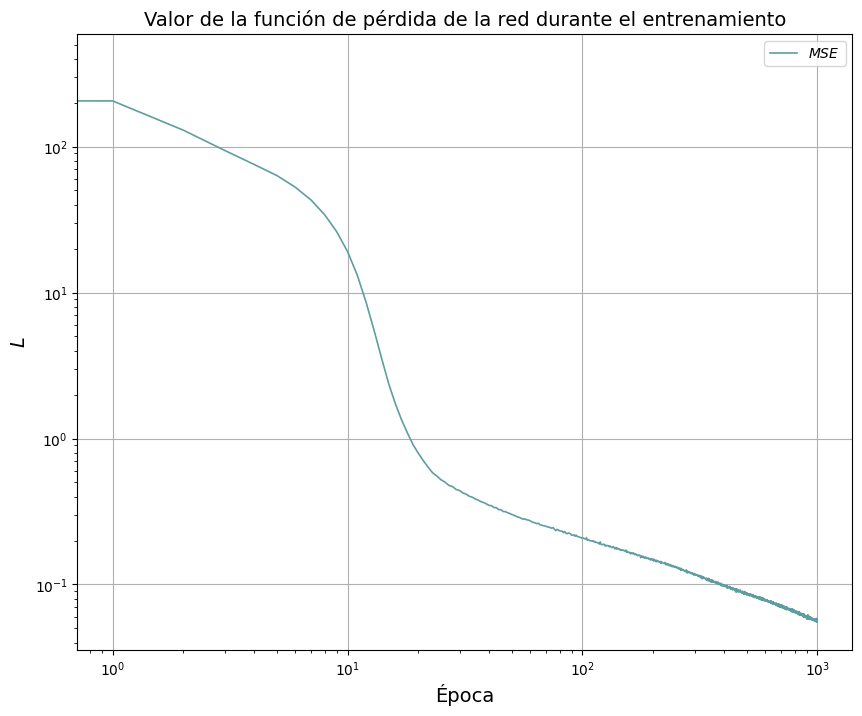

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (10,8), dpi = 100)
ax.loglog(history.history['Función de pérdida'], lw = 1.2, color = 'cadetblue', label = r'$MSE$')
ax.set_title('Valor de la función de pérdida de la red durante el entrenamiento', fontsize = 14)
ax.set_xlabel('Época', fontsize = 14)
ax.set_ylabel(r'$L$', fontsize = 14)
ax.legend()
ax.grid()
plt.show()

313/313 [==============================] - 0s 1ms/step


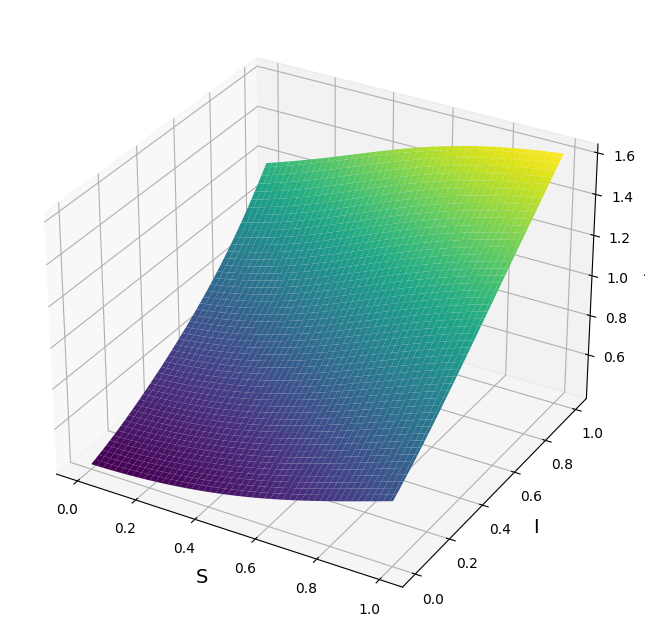

In [12]:
N = 100

S_range = np.linspace(0, 1, N)
I_range = np.linspace(0, 1, N)

S_mesh, I_mesh = np.meshgrid(S_range, I_range)

J_mesh = modelo.predict(np.column_stack((S_mesh.ravel(), I_mesh.ravel(), np.zeros_like(S_mesh.ravel()))))
J_mesh = np.reshape(J_mesh, S_mesh.shape)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(S_mesh, I_mesh, J_mesh, cmap = 'viridis')
ax.set_xlabel('S', fontsize = 14)
ax.set_ylabel('I', fontsize = 14)
ax.set_zlabel('J', fontsize = 14)
plt.show()



In [13]:
def u_optimo(S, I, modelo):

    with tf.GradientTape() as tape:

        tape.watch(S)
        tape.watch(I)

        J = modelo(tf.concat([S, I, tf.zeros_like(S)], axis = 1))
        [dJ_dS, dJ_dI] = tape.gradient(J, [S,I])

    u = tf.math.abs((-beta * S * I) / (2*b) * (dJ_dS - dJ_dI))

    return u

In [14]:
N_pob = 1000
S0 = 999/N_pob
I0 = (N_pob - S0)/N_pob
R0 = 0.0

dt = 0.001
t_max = 15
sqrt_dt = np.sqrt(dt)

S = np.zeros(int(t_max/dt) + 1)
I = np.zeros(int(t_max/dt) + 1)
R = np.zeros(int(t_max/dt) + 1)
u = np.zeros(int(t_max/dt) + 1)

S[0] = S0 * N_pob
I[0] = I0 * N_pob
R[0] = R0 * N_pob

sim_start = time.time()

for i in range(1, len(S)):

    u[i] = u_optimo(tf.constant([[S[i-1]]], dtype = tf.float32),
                    tf.constant([[I[i-1]]], dtype = tf.float32), modelo)

    #print(u[i])
    
    dW = np.random.randn()

    dS = -(1- u[i]) * beta * S[i-1] * I[i-1]/N_pob
    dI = (1 - u[i]) * beta * S[i-1] * I[i-1]/N_pob - gamma * I[i-1]
    dR = gamma * I[i-1]

    S[i] = S[i-1] + dS * dt - sigma * (S[i-1] * I[i-1])/N_pob * sqrt_dt * dW
    I[i] = I[i-1] + dI * dt + sigma * (S[i-1] * I[i-1])/N_pob * sqrt_dt *dW
    R[i] = R[i-1] + dR * dt

    if i % 1000 == 0:  # imprimir cada 1000 pasos
        print(f"Step {i}: S = {S[i]}, I = {I[i]}, R = {R[i]}")

sim_end = time.time()

Step 1000: S = 648.8563202279471, I = 727.9137966362565, R = 621.2308831357959
Step 2000: S = 452.5157499506316, I = 498.94572072934477, R = 1046.5395293200208
Step 3000: S = 320.39570872061097, I = 341.1931979289023, R = 1336.4120933504857
Step 4000: S = 232.06816165749703, I = 231.59974149039118, R = 1534.333096852116
Step 5000: S = 422.1650777985338, I = 0.04833332581834391, R = 1575.7875888756507
Step 6000: S = 422.1735015056785, I = 0.019249994768825548, R = 1575.8082484995596
Step 7000: S = 422.16972272274, I = 0.01243724445115471, R = 1575.8188400328197
Step 8000: S = 422.1654007351811, I = 0.009269069796882362, R = 1575.8263301950285
Step 9000: S = 422.16101626245575, I = 0.007773903967582509, R = 1575.8322098335802
Step 10000: S = 422.1564022167401, I = 0.007216464455681747, R = 1575.8373813188075
Step 11000: S = 422.1526591352163, I = 0.0062915142125509, R = 1575.8420493505762
Step 12000: S = 422.1488286945694, I = 0.0058355711872481895, R = 1575.8463357342503
Step 13000: S =

In [15]:
sim_time = sim_end - sim_start

print(f'Tiempo de simulación: {np.round(sim_time,2)} s')
print(f'Tiempo de simulación: {np.round(sim_time/60,2)} min')

Tiempo de simulación: 99.11 s
Tiempo de simulación: 1.65 min


In [16]:
S_no = np.zeros(int(t_max/dt) + 1)
I_no = np.zeros(int(t_max/dt) + 1)
R_no = np.zeros(int(t_max/dt) + 1)

S_no[0] = S0 * N_pob
I_no[0] = I0 * N_pob
R_no[0] = R0 * N_pob


for i in range(1, len(S_no)):

    dW = np.random.randn()

    dS_no = -beta * S_no[i-1] * I_no[i-1]/N_pob
    dI_no = beta * S_no[i-1] * I_no[i-1]/N_pob - gamma * I_no[i-1]
    dR_no = gamma * I_no[i-1]


    S_no[i] = S_no[i-1] + dS_no * dt + sigma * (S_no[i-1] * I_no[i-1])/N_pob * dW * sqrt_dt
    I_no[i] = I_no[i-1] + dI_no * dt + sigma * (S_no[i-1] * I_no[i-1])/N_pob * dW * sqrt_dt
    R_no[i] = R_no[i-1] + dR_no * dt 

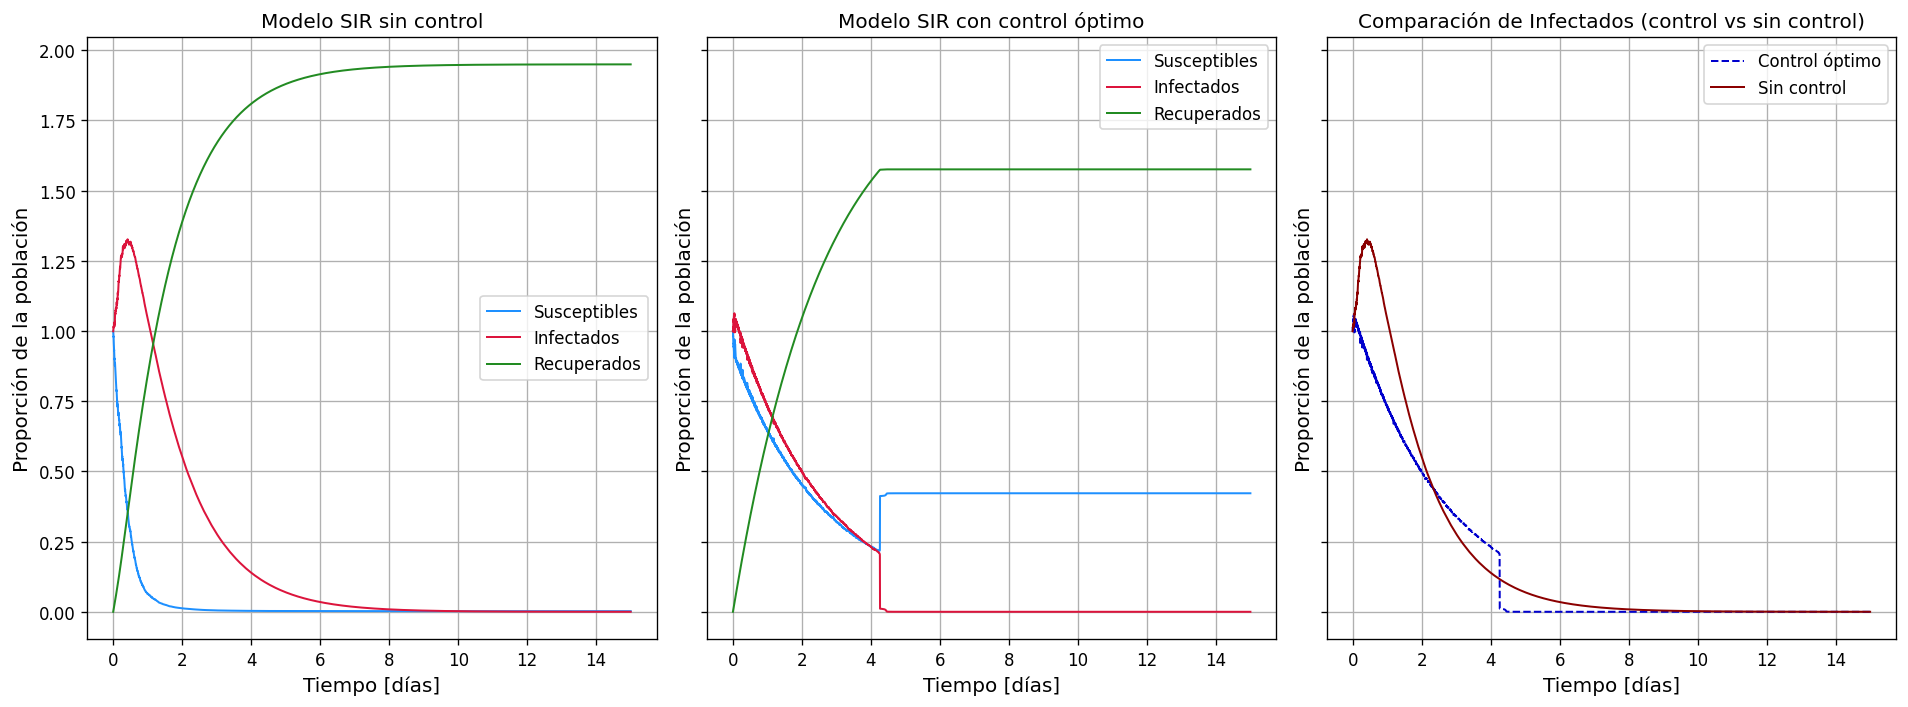

In [17]:
t = np.linspace(0, t_max, len(S))
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize =(16,6), dpi = 120, sharey = True)
ax1.plot(t, S_no/N_pob, lw = 1.2, color = 'dodgerblue', label = 'Susceptibles')
ax1.plot(t, I_no/N_pob, lw = 1.2, color = 'crimson', label = 'Infectados')
ax1.plot(t, R_no/N_pob, lw = 1.2, color = 'forestgreen', label = 'Recuperados')
ax1.set_xlabel('Tiempo [días]', fontsize = 12)
ax1.set_ylabel('Proporción de la población', fontsize = 12)
ax1.set_title('Modelo SIR sin control', fontsize = 12)
ax2.plot(t, S/N_pob, lw = 1.2, color = 'dodgerblue', label = 'Susceptibles')
ax2.plot(t, I/N_pob, lw = 1.2, color = 'crimson', label = 'Infectados')
ax2.plot(t, R/N_pob, lw = 1.2, color = 'forestgreen', label = 'Recuperados')
ax2.set_xlabel('Tiempo [días]', fontsize = 12)
ax2.set_ylabel('Proporción de la población', fontsize = 12)
ax2.set_title('Modelo SIR con control óptimo', fontsize = 12)
ax3.plot(t, I/N_pob, lw = 1.2, ls = '--', color = 'mediumblue', label = 'Control óptimo')
ax3.plot(t, I_no/N_pob, lw = 1.2, color = 'darkred', label = 'Sin control')
ax3.set_xlabel('Tiempo [días]', fontsize = 12)
ax3.set_ylabel('Proporción de la población', fontsize = 12)
ax3.set_title('Comparación de Infectados (control vs sin control)', fontsize = 12)
ax1.legend()
ax2.legend()
ax3.legend()
ax1.grid()
ax2.grid()
ax3.grid()
plt.tight_layout()
plt.show()